<a href="https://colab.research.google.com/github/VictoriaUsman/Big-Data/blob/main/Confluent_Kafka_Producer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from confluent_kafka import Producer
import pandas as pd


In [3]:
!pip install confluent-kafka

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 83.1 MB/s eta 0:00:00


In [5]:
import json,time

In [24]:
config = {
'bootstrap.servers':'pkc-921jm.us-east-2.aws.confluent.cloud:9092',
'security.protocol':'SASL_SSL',
'sasl.mechanisms':'PLAIN',
'sasl.username':'27TYZT32CIYOMPEF',
'sasl.password':'cfltsVoJ8hQ6jq/rDrhXKxnSX9q8Fa/Wq3vO/69R7o4eXtB2gonL41YmvRxjoOwA',
'session.timeout.ms':45000,
'client.id':'ian_macbook'

}

producer = Producer(config)

In [16]:
df = pd.read_csv('/content/first_100_customers.csv')

In [19]:
df.head()

,customer_id,name,city,state,country,registration_date,is_active
0,0,Customer_0,Pune,Maharashtra,India,2023-06-29,False
1,1,Customer_1,Bangalore,Tamil Nadu,India,2023-12-07,True
2,2,Customer_2,Hyderabad,Gujarat,India,2023-10-27,True
3,3,Customer_3,Bangalore,Karnataka,India,2023-10-17,False
4,4,Customer_4,Ahmedabad,Karnataka,India,2023-03-14,False


In [23]:
#converting the csv to json

json_records = df.to_dict(orient='records')
json_file = 'customer.json'

with open(json_file, 'w') as f:
    json.dump(json_records, f, indent=4)

print('File converted to JSON successfully.')

File converted to JSON successfully.


In [25]:
topic = 'topic_0'

In [27]:
with open('customer.json','r') as file:
  customer_data = json.load(file)


In [38]:
value = str(customer_data[0]).encode('utf-8')

In [37]:
key = str(value['customer_id']).encode('utf-8')

In [39]:
producer.produce(topic,key=key,value=value)

In [ ]:
#sending multiple messages to Kafka Cluster

In [42]:
def delivery_report(err, msg):
    if err is not None:
        print('Message delivery failed: {}'.format(err))
    else:
        print('Message delivered to {} [{}]'.format(msg.topic(), msg.partition()))


In [43]:
for records in customer_data:
  try:
    value = str(records).encode('utf-8')
    key = str(records['customer_id']).encode('utf-8')
    producer.produce(topic,key=key,value=value,callback=delivery_report)
    producer.poll(1)
  except Exception as e:
    print(e)

producer.flush()

print('message sent to kakfa successfully')

Message delivered to topic_0 [2]
Message delivered to topic_0 [2]
Message delivered to topic_0 [1]
Message delivered to topic_0 [1]
Message delivered to topic_0 [1]
Message delivered to topic_0 [1]
Message delivered to topic_0 [1]
Message delivered to topic_0 [0]
Message delivered to topic_0 [2]
Message delivered to topic_0 [0]
Message delivered to topic_0 [0]
Message delivered to topic_0 [0]
Message delivered to topic_0 [0]
Message delivered to topic_0 [2]
Message delivered to topic_0 [0]
Message delivered to topic_0 [1]
Message delivered to topic_0 [0]
Message delivered to topic_0 [2]
Message delivered to topic_0 [0]
Message delivered to topic_0 [1]
Message delivered to topic_0 [0]
Message delivered to topic_0 [1]
Message delivered to topic_0 [2]
Message delivered to topic_0 [1]
Message delivered to topic_0 [2]
Message delivered to topic_0 [0]
Message delivered to topic_0 [1]
Message delivered to topic_0 [0]
Message delivered to topic_0 [0]
Message delivered to topic_0 [2]
Message de

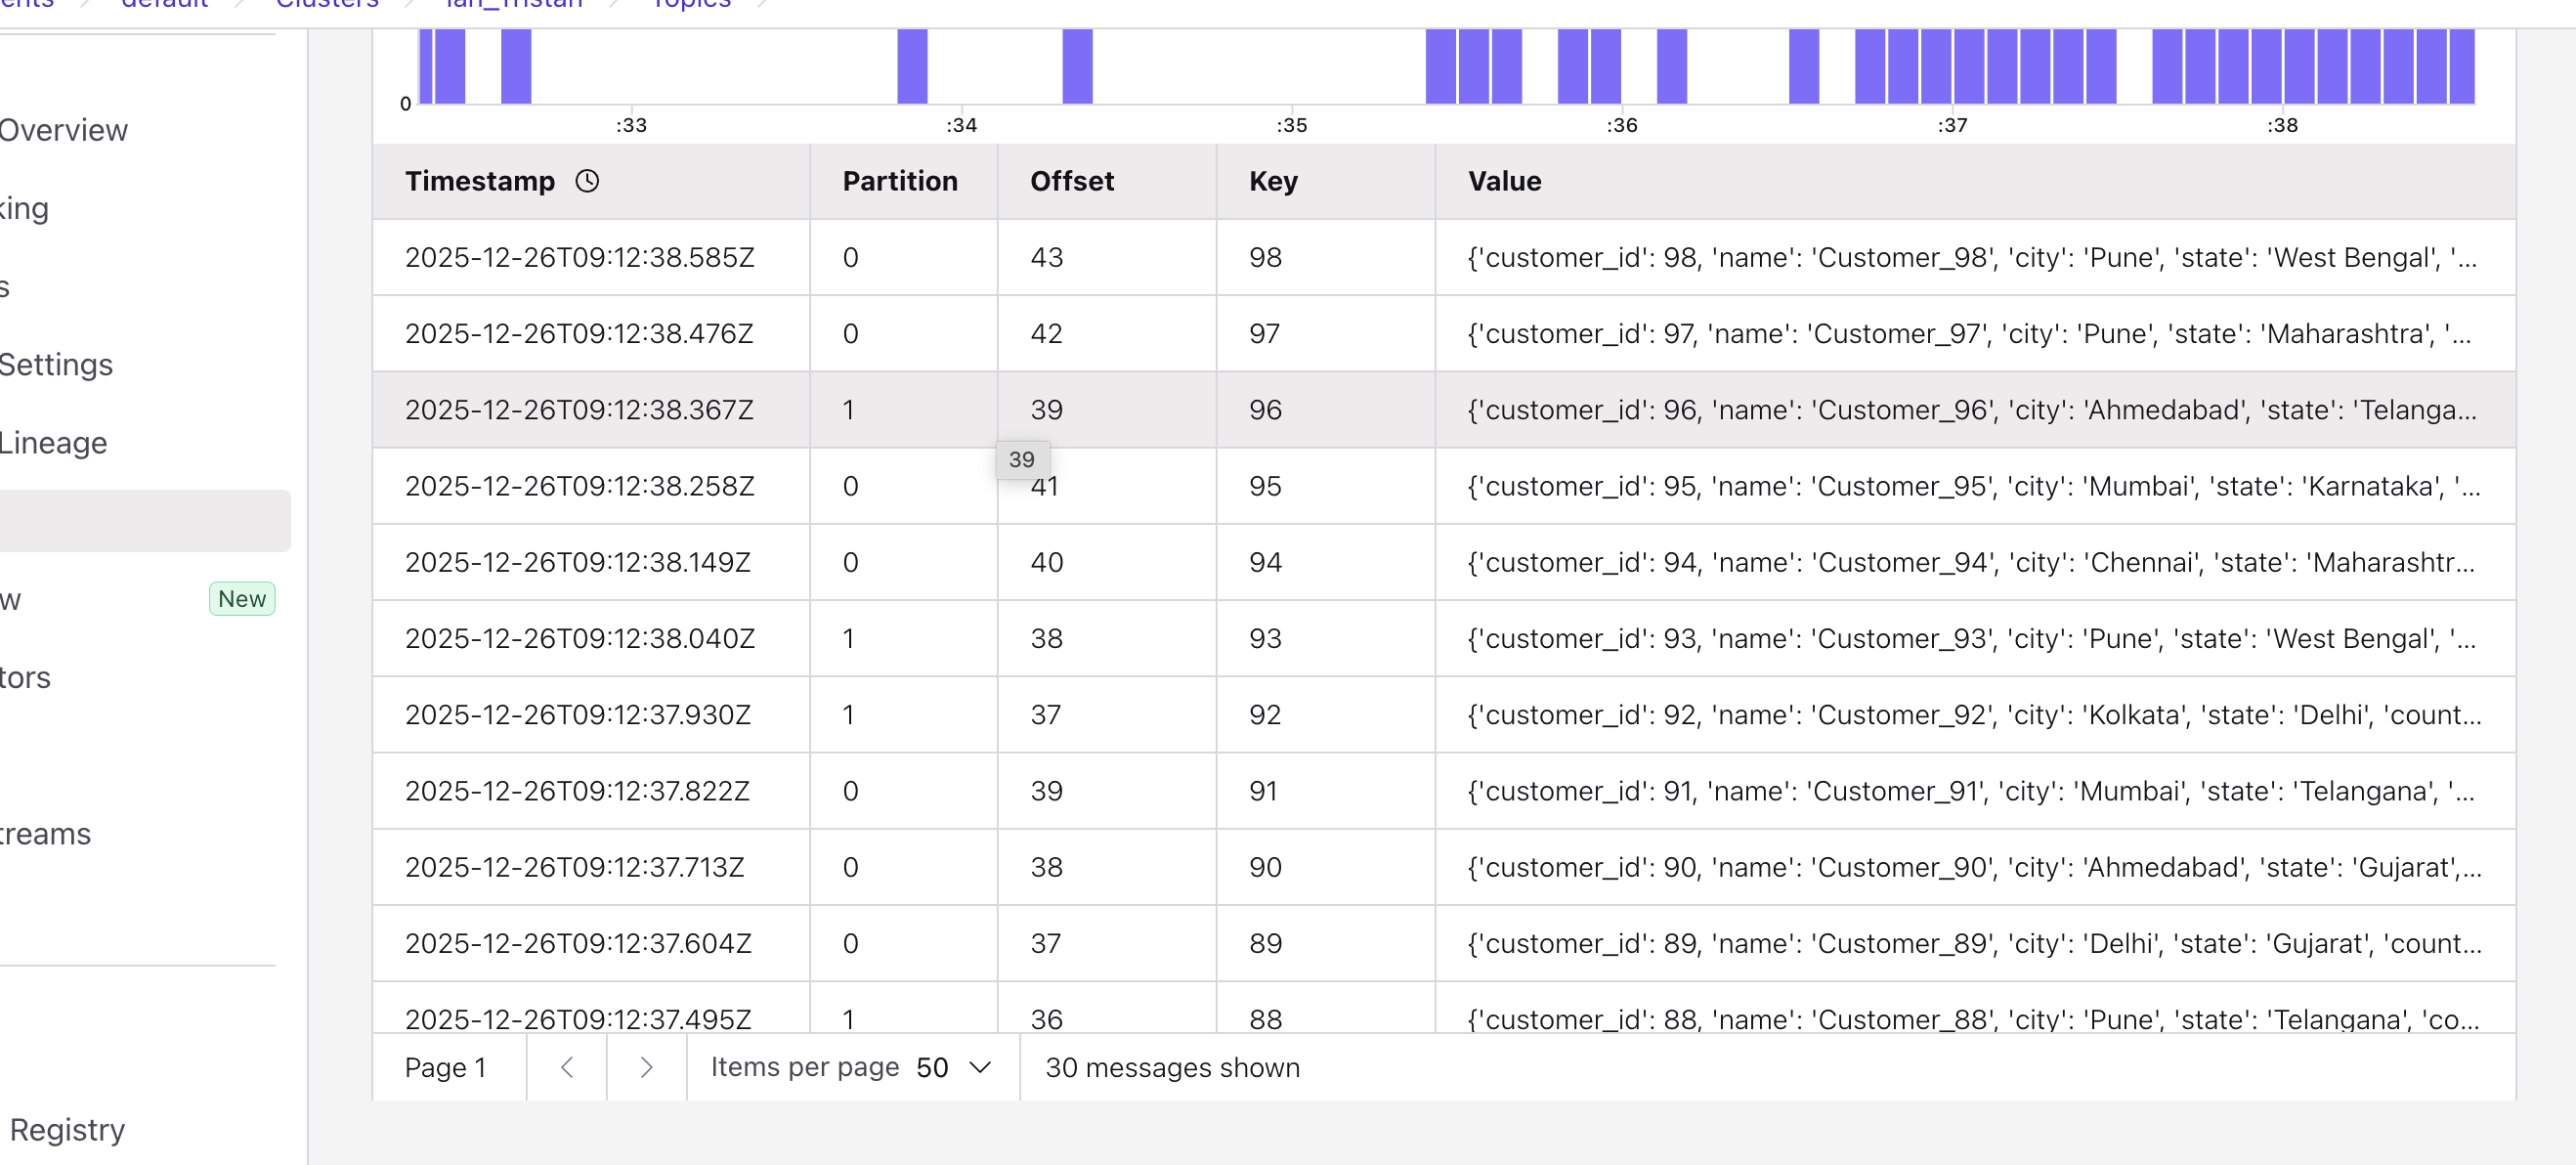